In [79]:
#importing relavent libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##  Part 1 - understanding and cleaning the data

## Explanation for all columns

**age**  -     The age of the insured client

**sex**   -    The Gender of the insured client

**BMI**   - Body Mass Index ,  is a value derived from the mass (weight) and height of a person. This value influences the                 health of a given person. Generally a good bmi is between 18.5 to 25

**children**        -  Number of children covered by health insurance / Number of dependents.

**smoker**             - Whether the insured customer has smokes or not.

**region**     -   The beneficiary's residential area in the US -  northeast, southeast, southwest and northwest.

**charges**     -  The amount paid periodically to the insurer by the insured client.



#### Lets start examining the data

In [81]:
df.shape
#1338 rows , 7 columns 

(1338, 7)

In [82]:
df.isnull().sum()
#Great! no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [83]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

3 non numerical values , 2 of them are easy to deal with since they are yes or no values. The region is a bit trickier so using the value_counts method lets see exactly what we are dealing with

In [84]:
df["region"].value_counts()
#Good! only 4 regions, we will soon change them to numerical values

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [85]:
df.describe()
#Wanting to get an idea of what is a regular price for the health insurence, and other information, df.describe() is very helpful

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Are data is pretty clean , and we now have a good understanding of it. Therefore we can move on to visualizing.

##  Part 2 -  Visualization

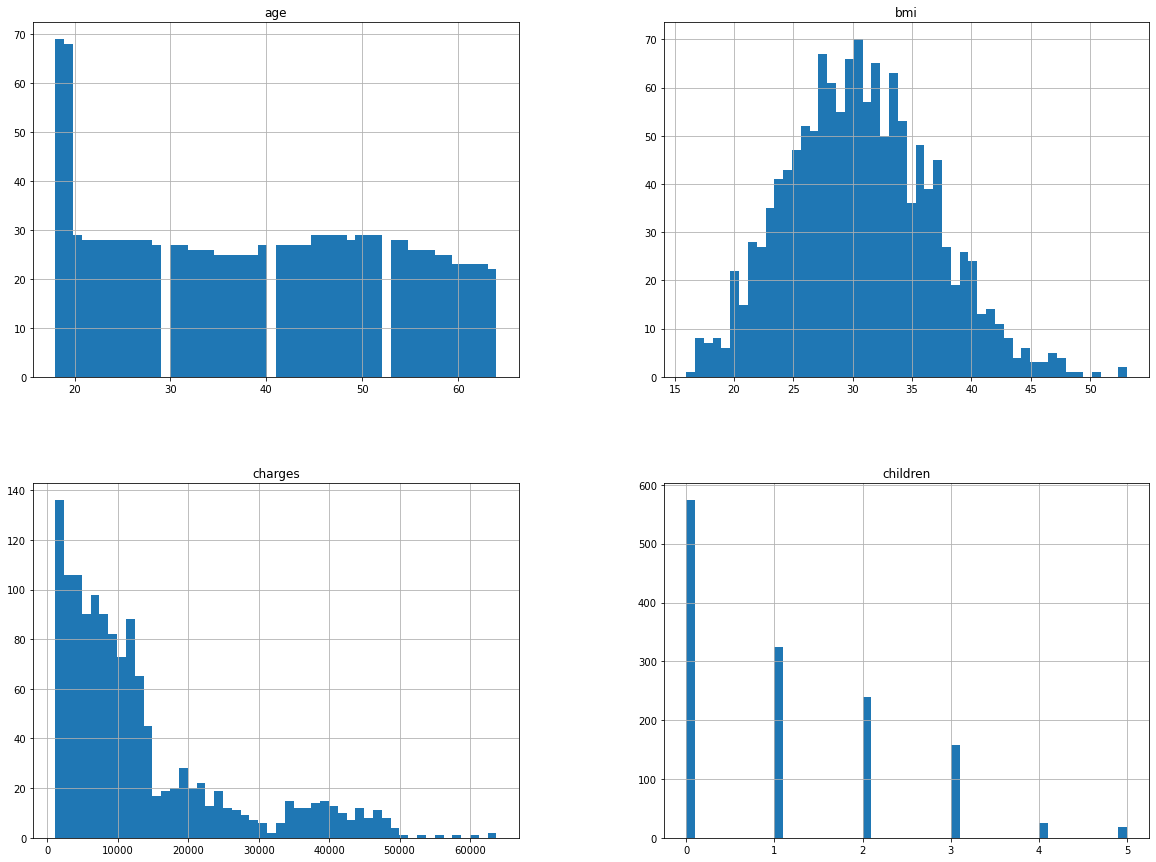

In [86]:
df.hist(bins=50, figsize=(20,15))
plt.show()

* Exculding bmi , are histograms are head heavy , meaning they extend much farther to the left then to the right. In other words in the numerical columns there is more smaller attributes rather then large ones.
* The bmi histiogram is more centerd and balanced , meaning most insured clients's bmi are around 30-35

In order to continue vizualizing all of my data set properly and start finding correlations, i will use the LabelEncoder function to change all my data to numerical. The function will chage smoker and sex to 0 or 1 (female = 0 , male = 1) , and change the regions to 0,1,2,3.

In [87]:
from sklearn.preprocessing import LabelEncoder
labelE = LabelEncoder()
df['sex'] = labelE.fit_transform(df['sex'])
df['smoker'] = labelE.fit_transform(df['smoker'])
df['region'] = labelE.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [88]:
#now that my data is all numerical i can run a corelation map to unterstand better which value has strong corelation to charges.
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

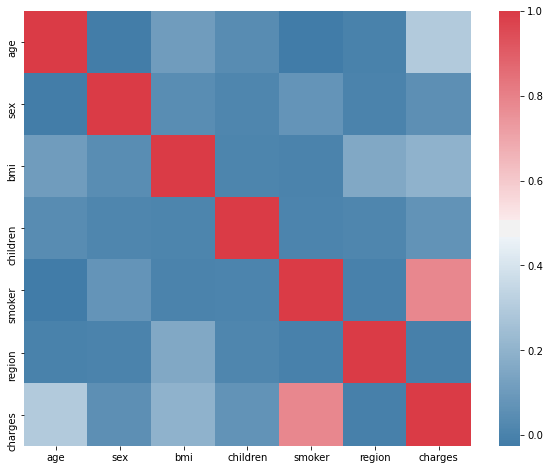

In [89]:
#lets see that in a heat map
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(df.corr() , cmap=sns.diverging_palette(240,10,as_cmap=True) ,ax=ax)

#### Observations


* **1.** A very strong correlation is observed  with weather the patient smokes or not.

* **2.** Observing the  age and bmi factors , we see they do have some correlation with charges but not as strong as i expected.

* **3.** I would like to investigate smoking and bmi in more detail. In order to do that im going to first see the Distribution of charges for smokers/ non smokers. Then do the same for bmi ( obese/ non obese) , and then see those to factors together with charges and fully grasp who pays more for health insurance, obese non smokers or maybe non obese smokers?
 

In [90]:
#write obseravations for heat map and investigate smoking and bmi ( maybe age)
#next step is to determine how many corraltion maps to use. should i use seaborn?


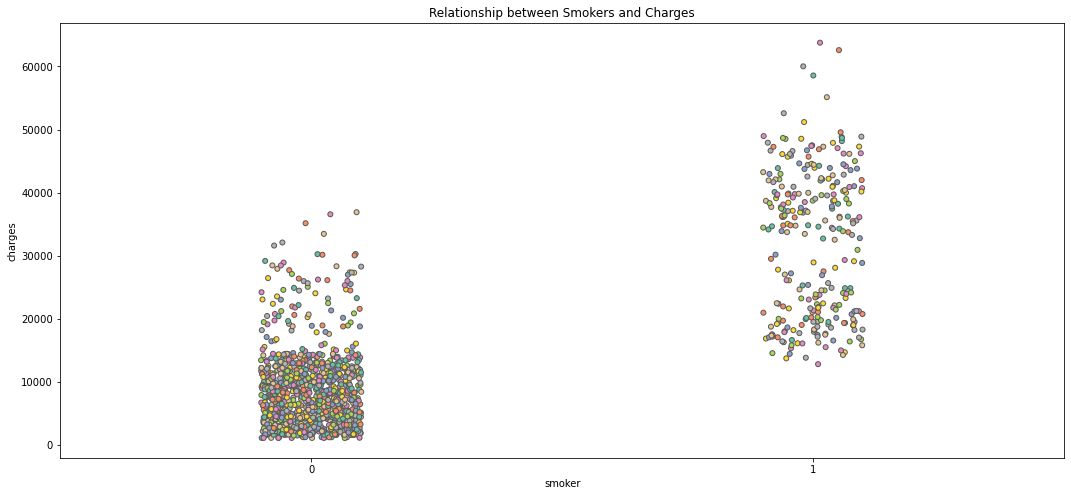

In [91]:
f, ax = plt.subplots(figsize=(18,8))
sns.stripplot(x="smoker", y="charges", hue="bmi", data=df, ax=ax, linewidth=1, palette="Set2")
ax.legend_.remove()
ax.set_title("Relationship between Smokers and Charges")

plt.show()

A quick google search lets me know that bmi obove 30 is obese so lets create plots showing the charges among obese and non obese patients.
https://www.cdc.gov/obesity/adult/defining.html

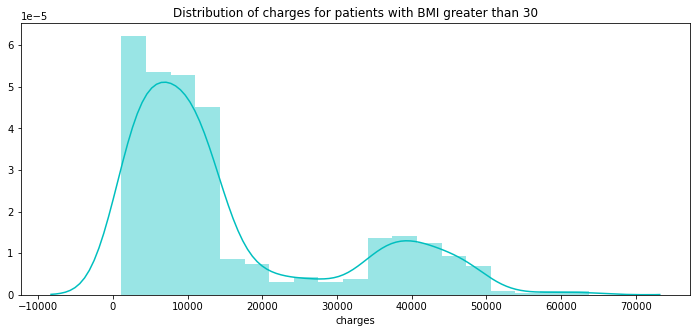

In [92]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'c')

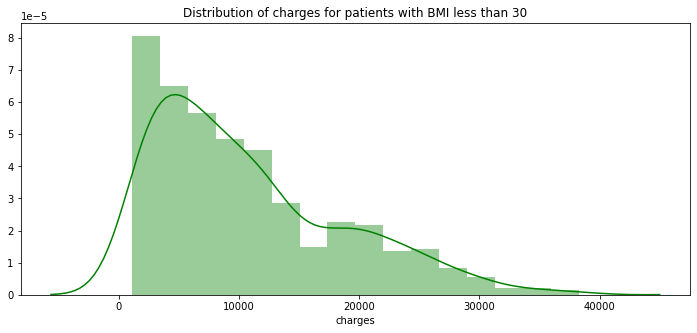

In [93]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'g' )

Just as we suspected and quite trivialy Patients with BMI above 30 spend more on treatment!

now lets show a scatter plot of smoking and obisity together.

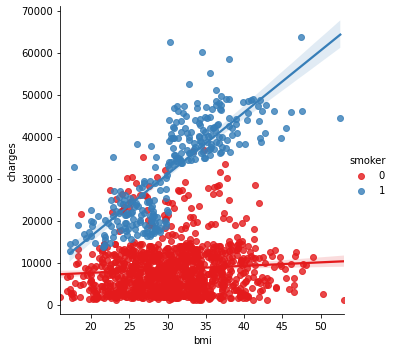

In [94]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set1')

#### Observations
*  We can see that charges are more impacted by smokers rather then obesity, and the linear line goes sky high for clients that smomke and have an high bmi. Insured clients that don't smoke don't pay that much more as the bmi grows

*  However we do see that there is a large group of obese clients that are paying around 40,000$ on health insurance which is a crazy high price.

*  Previously we also saw correlation between age and charges so let's see one final graph similar to the one we just saw but with age instead of bmi

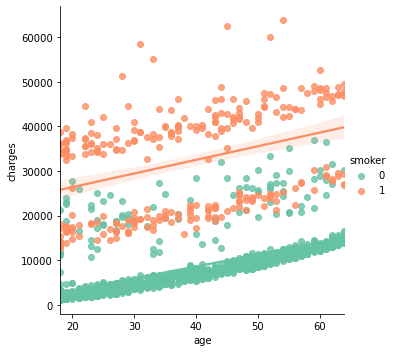

In [95]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set2')

We see a very similiar pattern when it comes to smoking clients. Although not like the bmi graph we see the linear line growing in the same pace between smokers and non smokers as the age progresses. This means that age rather then bmi has a more impact on the charges, even when it comes to smoking/non smoking clients

## Part 3 -  Machine learning algorithms